In [4]:
import arcgis
import pandas as pd
import numpy as np
import cv2
from arcgis.gis import GIS
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('coordinates_distances_heading_elevation.csv')

In [6]:
df

,Unnamed: 0,longitude,latitude,image_degrees_from_north,distance_to_next,elevation
0,0,35.61374,-120.80120,84.289407,1,444.438110
1,1,35.61374,-120.80119,73.300756,9,444.534546
2,2,35.61377,-120.80109,71.565051,6,445.264343
3,3,35.61379,-120.80103,63.434949,14,445.466919
4,4,35.61386,-120.80089,75.963757,4,445.096252
...,...,...,...,...,...,...
1206,1206,35.62041,-120.69691,87.397438,20,247.022293
1207,1207,35.62042,-120.69669,89.887655,46,246.010040
1208,1208,35.62042,-120.69618,85.763605,24,243.800903
1209,1209,35.62044,-120.69591,86.054814,27,243.526001


In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
len(df)

1211

In [9]:
elevation_change_list = []
for i in range(len(df)):
    if i == 1210:
        elevation_change_list.append(0)
    else:
        elevation_change_list.append(df['elevation'][i+1]-df['elevation'][i])

In [10]:
df['elevation_change'] = elevation_change_list

In [11]:
df

,longitude,latitude,image_degrees_from_north,distance_to_next,elevation,elevation_change
0,35.61374,-120.80120,84.289407,1,444.438110,0.096436
1,35.61374,-120.80119,73.300756,9,444.534546,0.729797
2,35.61377,-120.80109,71.565051,6,445.264343,0.202576
3,35.61379,-120.80103,63.434949,14,445.466919,-0.370667
4,35.61386,-120.80089,75.963757,4,445.096252,0.054108
...,...,...,...,...,...,...
1206,35.62041,-120.69691,87.397438,20,247.022293,-1.012253
1207,35.62042,-120.69669,89.887655,46,246.010040,-2.209137
1208,35.62042,-120.69618,85.763605,24,243.800903,-0.274902
1209,35.62044,-120.69591,86.054814,27,243.526001,-0.895416


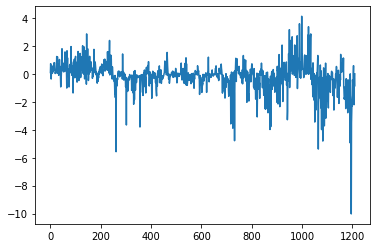

In [12]:
plt.plot(elevation_change_list)

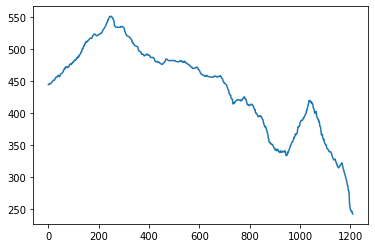

In [13]:
plt.plot(df['elevation'])

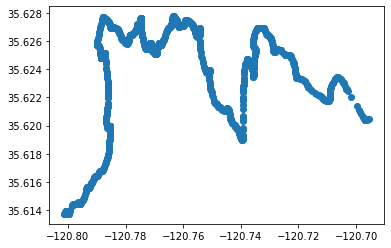

In [14]:
plt.scatter(df['latitude'], df['longitude'])

In [15]:
%matplotlib notebook

In [27]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')

z_line = df['elevation']
x_line = df['longitude']
y_line = df['latitude']
ax.plot3D(x_line, y_line, z_line, 'gray')
plt.show()

<IPython.core.display.Javascript object>

In [17]:
df['distance_to_next'].median()

8.0